In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

In [265]:
df=pd.read_csv(r'C:\Users\DEBADRITO\Desktop\Term 2\MRKA PD\Rawdata.csv')
df.head(5)

,Sales,Price,Feature,Display,Price - Competitor 1,Price - Competitor 2,Price - Competitor 3,Price - Competitor 4,Price - Competitor 5
0,20.0,5.69,0,0,4.07,4.11,5.28,4.69,3.29
1,26.0,5.97,0,0,4.07,3.78,5.25,3.95,3.49
2,41.0,6.19,0,0,4.06,3.42,5.54,3.33,3.69
3,34.0,5.78,0,0,4.07,3.51,4.50,3.97,2.17
4,32.0,6.19,0,0,4.07,3.40,5.50,2.76,3.69


In [429]:
means=[]



def mean_x(a):

      i=round(df[a].mean())
      means.append(i)

In [430]:
mean_x("Price")

In [431]:
mean_x("Price - Competitor 1")

In [432]:
mean_x("Price - Competitor 2")

In [433]:
mean_x("Price - Competitor 3")

In [434]:
mean_x("Price - Competitor 4")

In [435]:
mean_x("Price - Competitor 5")

In [436]:
means

[6, 4, 4, 6, 4, 3]

In [443]:
means_new=pd.DataFrame(means)

In [439]:
means_new

,0
0,6
1,4
2,4
3,6
4,4
5,3


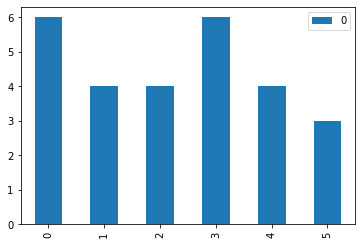

In [452]:
means_new.plot.bar()

In [453]:
df.head(5)

,Sales,Price,Feature,Display,Price - Competitor 1,Price - Competitor 2,Price - Competitor 3,Price - Competitor 4,Price - Competitor 5,Display_Features,Display_Price,Price_Features,Display_Price_Features
0,20.0,5.69,0,0,4.07,4.11,5.28,4.69,3.29,0,0.0,0.0,0.0
1,26.0,5.97,0,0,4.07,3.78,5.25,3.95,3.49,0,0.0,0.0,0.0
2,41.0,6.19,0,0,4.06,3.42,5.54,3.33,3.69,0,0.0,0.0,0.0
3,34.0,5.78,0,0,4.07,3.51,4.50,3.97,2.17,0,0.0,0.0,0.0
4,32.0,6.19,0,0,4.07,3.40,5.50,2.76,3.69,0,0.0,0.0,0.0


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3238 entries, 0 to 3237
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sales                 3238 non-null   float64
 1   Price                 3238 non-null   float64
 2   Feature               3238 non-null   int64  
 3   Display               3238 non-null   int64  
 4   Price - Competitor 1  3238 non-null   float64
 5   Price - Competitor 2  3238 non-null   float64
 6   Price - Competitor 3  3238 non-null   float64
 7   Price - Competitor 4  3238 non-null   float64
 8   Price - Competitor 5  3238 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 227.8 KB


In [267]:
X=df[["Price","Feature","Display"]]

In [268]:
y=df["Sales"]
y

0        20.0
1        26.0
2        41.0
3        34.0
4        32.0
        ...  
3233     53.0
3234     35.0
3235    113.0
3236    117.0
3237    723.0
Name: Sales, Length: 3238, dtype: float64

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [270]:
#Linear Regression

In [271]:
from sklearn.linear_model import LinearRegression

# instantiate

lm = LinearRegression()

# fit

lm.fit(X_train, y_train)

LinearRegression()

In [272]:
y_pred = lm.predict(X_test)

In [273]:
from sklearn.metrics import mean_absolute_error,r2_score

print("mean_absolute_error:- ",mean_absolute_error(y_true=y_test, y_pred=y_pred))

mean_absolute_error:-  36.09865812740462


In [274]:
print("R square:- ",r2_score(y_true=y_test, y_pred=y_pred))

R square:-  0.5001447957898622


In [275]:
#OLS

In [276]:
import statsmodels.api as sm

In [277]:
X_train=sm.add_constant(X_train)


In [278]:
model=sm.OLS(y_train,X_train)

In [279]:
results=model.fit()
results.params

const      334.377840
Price      -49.015863
Feature     62.454090
Display    104.894602
dtype: float64

In [280]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     879.6
Date:                Tue, 29 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:13:53   Log-Likelihood:                -12611.
No. Observations:                2266   AIC:                         2.523e+04
Df Residuals:                    2262   BIC:                         2.525e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        334.3778     16.446     20.332      0.0

In [371]:
cor = df.corr()


,Sales,Price,Feature,Display,Price - Competitor 1,Price - Competitor 2,Price - Competitor 3,Price - Competitor 4,Price - Competitor 5,Display_Features,Display_Price,Price_Features,Display_Price_Features
Sales,1.000000,-0.568337,0.554512,0.586432,0.076077,0.000520,-0.032863,0.036951,-0.092620,0.650002,0.531954,0.509892,0.611326
Price,-0.568337,1.000000,-0.497057,-0.389693,-0.050809,0.231586,0.245632,0.163036,0.199572,-0.390235,-0.344755,-0.453949,-0.362852
Feature,0.554512,-0.497057,1.000000,0.395313,-0.064475,0.050459,-0.009659,0.033663,-0.018128,0.618363,0.367607,0.993996,0.614872
Display,0.586432,-0.389693,0.395313,1.000000,0.056593,0.083311,0.018131,0.070811,-0.032234,0.718040,0.993062,0.373978,0.713985
Price - Competitor 1,0.076077,-0.050809,-0.064475,0.056593,1.000000,-0.057367,0.083864,0.039383,-0.026211,0.025484,0.055941,-0.068081,0.023371
Price - Competitor 2,0.000520,0.231586,0.050459,0.083311,-0.057367,1.000000,0.376283,0.327334,0.181781,0.032258,0.096036,0.061147,0.038824
Price - Competitor 3,-0.032863,0.245632,-0.009659,0.018131,0.083864,0.376283,1.000000,0.212282,0.156989,-0.002643,0.025076,0.004736,-0.000480
Price - Competitor 4,0.036951,0.163036,0.033663,0.070811,0.039383,0.327334,0.212282,1.000000,0.093709,0.040124,0.075657,0.048604,0.043800
Price - Competitor 5,-0.092620,0.199572,-0.018128,-0.032234,-0.026211,0.181781,0.156989,0.093709,1.000000,-0.020393,-0.021901,-0.004795,-0.014518
Display_Features,0.650002,-0.390235,0.618363,0.718040,0.025484,0.032258,-0.002643,0.040124,-0.020393,1.000000,0.676908,0.589922,0.994354


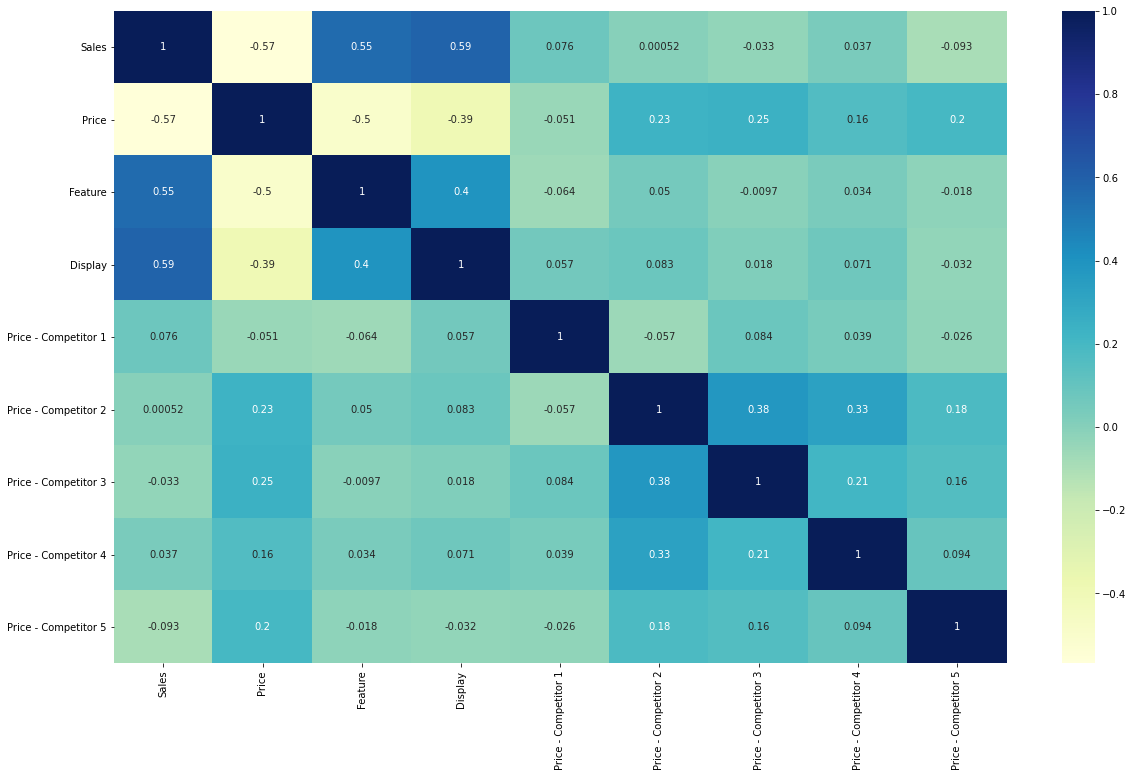

In [282]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(20,12))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [283]:
df.head(5)

,Sales,Price,Feature,Display,Price - Competitor 1,Price - Competitor 2,Price - Competitor 3,Price - Competitor 4,Price - Competitor 5
0,20.0,5.69,0,0,4.07,4.11,5.28,4.69,3.29
1,26.0,5.97,0,0,4.07,3.78,5.25,3.95,3.49
2,41.0,6.19,0,0,4.06,3.42,5.54,3.33,3.69
3,34.0,5.78,0,0,4.07,3.51,4.50,3.97,2.17
4,32.0,6.19,0,0,4.07,3.40,5.50,2.76,3.69


In [284]:
df.groupby(["Feature","Display"]).agg({'Sales':'mean'})

Sales
Feature Display            
0       0         51.615446
        1        125.596859
1       0        116.910828
        1        291.927350

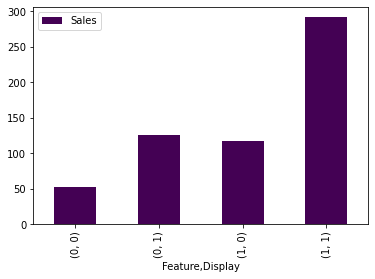

In [382]:
df.groupby(["Feature","Display"]).agg({'Sales':'mean'}).plot.bar(cmap="viridis")
plt.show()

In [372]:
sales_mean=df[(df['Feature']==1.0) & (df['Display']==1.0)]['Sales'].mean()
print("Sales mean where both Display and features are present is :-",round(sales_mean))

Sales mean where both Display and features are present is :- 292


In [286]:
#interactive effect by multiplying the key features
#then OLS
#Then OLS with competitors features
#Then try ti improve R2


In [ ]:
#Feature Engineering

In [287]:
df["Display_Features"]=df["Display"]*df["Feature"]

df["Display_Price"]=df["Display"]*df["Price"]
df["Price_Features"]=df["Price"]*df["Feature"]
df["Display_Price_Features"]=df["Display"]*df["Feature"]*df["Price"]

In [288]:
df.head(5)

,Sales,Price,Feature,Display,Price - Competitor 1,Price - Competitor 2,Price - Competitor 3,Price - Competitor 4,Price - Competitor 5,Display_Features,Display_Price,Price_Features,Display_Price_Features
0,20.0,5.69,0,0,4.07,4.11,5.28,4.69,3.29,0,0.0,0.0,0.0
1,26.0,5.97,0,0,4.07,3.78,5.25,3.95,3.49,0,0.0,0.0,0.0
2,41.0,6.19,0,0,4.06,3.42,5.54,3.33,3.69,0,0.0,0.0,0.0
3,34.0,5.78,0,0,4.07,3.51,4.50,3.97,2.17,0,0.0,0.0,0.0
4,32.0,6.19,0,0,4.07,3.40,5.50,2.76,3.69,0,0.0,0.0,0.0


In [295]:
X=df.iloc[:,1:]

In [296]:
X.head(5)

,Price,Feature,Display,Price - Competitor 1,Price - Competitor 2,Price - Competitor 3,Price - Competitor 4,Price - Competitor 5,Display_Features,Display_Price,Price_Features,Display_Price_Features
0,5.69,0,0,4.07,4.11,5.28,4.69,3.29,0,0.0,0.0,0.0
1,5.97,0,0,4.07,3.78,5.25,3.95,3.49,0,0.0,0.0,0.0
2,6.19,0,0,4.06,3.42,5.54,3.33,3.69,0,0.0,0.0,0.0
3,5.78,0,0,4.07,3.51,4.50,3.97,2.17,0,0.0,0.0,0.0
4,6.19,0,0,4.07,3.40,5.50,2.76,3.69,0,0.0,0.0,0.0


In [297]:
y=df["Sales"]

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [301]:
#OLS 2

In [302]:
X_train=sm.add_constant(X_train)

In [303]:
model=sm.OLS(y_train,X_train)

In [304]:
results=model.fit()
results.params

const                     138.425533
Price                     -29.884473
Feature                   134.936949
Display                   404.856034
Price - Competitor 1       10.449697
Price - Competitor 2        2.872742
Price - Competitor 3        2.094836
Price - Competitor 4        7.174354
Price - Competitor 5       -3.073699
Display_Features          636.901820
Display_Price             -63.857053
Price_Features            -17.424168
Display_Price_Features   -115.455846
dtype: float64

In [305]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     375.7
Date:                Tue, 29 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:18:00   Log-Likelihood:                -12242.
No. Observations:                2266   AIC:                         2.451e+04
Df Residuals:                    2253   BIC:                         2.458e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    138

In [306]:
data_final=df.copy()

In [314]:
data_final.drop(df.columns[[5,6,8]],axis=1,inplace=True)

In [328]:
data_final

,Sales,Price,Feature,Display,Price - Competitor 1,Price - Competitor 4,Display_Features,Display_Price,Price_Features,Display_Price_Features
0,20.0,5.69,0,0,4.07,4.69,0,0.00,0.00,0.00
1,26.0,5.97,0,0,4.07,3.95,0,0.00,0.00,0.00
2,41.0,6.19,0,0,4.06,3.33,0,0.00,0.00,0.00
3,34.0,5.78,0,0,4.07,3.97,0,0.00,0.00,0.00
4,32.0,6.19,0,0,4.07,2.76,0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
3233,53.0,5.99,0,0,4.93,4.04,0,0.00,0.00,0.00
3234,35.0,5.97,0,0,4.93,4.04,0,0.00,0.00,0.00
3235,113.0,5.95,0,0,4.93,4.83,0,0.00,0.00,0.00
3236,117.0,5.97,0,0,4.93,4.60,0,0.00,0.00,0.00


In [329]:
#OLS 3

In [337]:
X=data_final.iloc[:,1:]
X.head(5)

,Price,Feature,Display,Price - Competitor 1,Price - Competitor 4,Display_Features,Display_Price,Price_Features,Display_Price_Features
0,5.69,0,0,4.07,4.69,0,0.0,0.0,0.0
1,5.97,0,0,4.07,3.95,0,0.0,0.0,0.0
2,6.19,0,0,4.06,3.33,0,0.0,0.0,0.0
3,5.78,0,0,4.07,3.97,0,0.0,0.0,0.0
4,6.19,0,0,4.07,2.76,0,0.0,0.0,0.0


In [338]:
y=data_final["Sales"]

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [342]:
X_train.head(5)

,const,Price,Feature,Display,Price - Competitor 1,Price - Competitor 4,Display_Features,Display_Price,Price_Features,Display_Price_Features
2020,1.0,5.94,0,0,3.49,4.52,0,0.0,0.0,0.0
3129,1.0,6.09,0,0,4.89,3.33,0,0.0,0.0,0.0
3197,1.0,5.89,0,0,4.92,4.20,0,0.0,0.0,0.0
3016,1.0,5.00,0,0,3.27,4.33,0,0.0,0.0,0.0
722,1.0,5.99,0,0,3.85,4.80,0,0.0,0.0,0.0


In [340]:
X_train=sm.add_constant(X_train)

In [343]:
model=sm.OLS(y_train,X_train)

In [344]:
results=model.fit()
results.params

const                     141.976157
Price                     -28.947245
Feature                   139.389517
Display                   408.300611
Price - Competitor 1       10.688429
Price - Competitor 4        7.883165
Display_Features          635.505150
Display_Price             -64.257482
Price_Features            -18.115263
Display_Price_Features   -115.486223
dtype: float64

In [345]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     500.0
Date:                Tue, 29 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:35:28   Log-Likelihood:                -12244.
No. Observations:                2266   AIC:                         2.451e+04
Df Residuals:                    2256   BIC:                         2.457e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    141

In [ ]:
#LINEAR MODEL TO CHECK MSE

In [346]:
X=data_final.iloc[:,1:]
X.head(5)

,Price,Feature,Display,Price - Competitor 1,Price - Competitor 4,Display_Features,Display_Price,Price_Features,Display_Price_Features
0,5.69,0,0,4.07,4.69,0,0.0,0.0,0.0
1,5.97,0,0,4.07,3.95,0,0.0,0.0,0.0
2,6.19,0,0,4.06,3.33,0,0.0,0.0,0.0
3,5.78,0,0,4.07,3.97,0,0.0,0.0,0.0
4,6.19,0,0,4.07,2.76,0,0.0,0.0,0.0


In [347]:
y=data_final["Sales"]

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [349]:
# instantiate

lm = LinearRegression()

# fit

lm.fit(X_train, y_train)

LinearRegression()

In [350]:
y_pred = lm.predict(X_test)

In [351]:
from sklearn.metrics import mean_absolute_error,r2_score

print("mean_absolute_error:- ",mean_absolute_error(y_true=y_test, y_pred=y_pred))

mean_absolute_error:-  34.1573417290571


In [352]:
print("R square:- ",r2_score(y_true=y_test, y_pred=y_pred))

R square:-  0.5817833350599807


In [406]:
#Ensemble

In [365]:
from sklearn.ensemble import RandomForestRegressor

In [366]:
RF=RandomForestRegressor(random_state=0)

In [367]:
RF.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [368]:
y_pred_RF=RF.predict(X_test)

In [369]:
print("mean_absolute_error RF:- ",mean_absolute_error(y_true=y_test, y_pred=y_pred_RF))

mean_absolute_error RF:-  32.75064528449189


In [370]:
df_feature_importance = pd.DataFrame(RF.feature_importances_, index=X_train.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

,feature importance
Display_Price_Features,0.265456
Display_Features,0.234152
Price,0.161370
Price - Competitor 1,0.123129
Price - Competitor 4,0.088688
Display_Price,0.066134
Price_Features,0.055521
Feature,0.003052
Display,0.002499
